# Exercice

Se cuenta con un archivo de datos sobre la encuestarealizada por el INEI en el año 2020 a hogares rurales y urbanos que cuenta con los siguientes campos:

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

In [5]:
#cargar datos inei.cvs con pandas
df = pd.read_csv('inei.csv', sep=';')
df

,Año,Num Personas Hogar,Niños menores de 5 años,Resultado de la encuesta,Departamento(a),Área residencia
0,2020,1,0,1,1,1
1,2020,3,1,1,1,1
2,2020,4,1,1,1,1
3,2020,3,0,1,1,1
4,2020,4,0,1,1,1
...,...,...,...,...,...,...
38078,2020,1,0,1,25,2
38079,2020,2,0,1,25,2
38080,2020,1,0,1,25,2
38081,2020,6,0,1,25,2


In [6]:
#Calcular el número total de hogares encuestados, solo mostrar un carácter.
df.count()

Año                         38083
Num Personas Hogar          38083
Niños menores de 5 años     38083
Resultado de la encuesta    38083
Departamento(a)             38083
Área residencia             38083
dtype: int64

In [7]:
#Calcular el porcentaje de hogares en áreas rurales.
rural=df['Área residencia'].value_counts(normalize=True)*100
rural[2].round(2).astype(str) + '%'

'33.74%'

In [8]:
#Encontrar el departamento con el mayor promedio de personas por hogar. sin gropby
df.groupby('Departamento(a)')['Num Personas Hogar'].mean().sort_values(ascending=False).head(1)

Departamento(a)
16    4.589481
Name: Num Personas Hogar, dtype: float64

In [9]:
#Calcular la proporción de hogares con niños menores a 5 años en áreas urbanas.
hogares= df[(df['Área residencia'])==1 & (df['Niños menores de 5 años']>=1)]
proporcion = len(hogares)/len(df)*100
print(f"La proporcion de hogares con niños menores a 5 años en áreas urbanas es: {proporcion} %")


La proporcion de hogares con niños menores a 5 años en áreas urbanas es: 32.53682745582018 %


In [10]:
#5. Identificar el departamento con la mayor proporción de hogares con resultado "Aplazado". 

aplazado = df[df['Resultado de la encuesta']==4]['Departamento(a)'].value_counts()
if  aplazado.sum() > 0:
    print((aplazado.value_counts(normalize=True)*100).max())
else:
    print("No existen datos")


No existen datos


In [11]:
#6. Calcular el promedio de personas por hogar en hogares con resultado "Completo".
resultado=df[df['Resultado de la encuesta']==1]['Num Personas Hogar'].mean().round(0)
print(f"El promedio de personas por hogar en hogares con resultado 'Completo' es: {resultado}" )

El promedio de personas por hogar en hogares con resultado 'Completo' es: 4.0


In [12]:
#7.Encontrar el departamento con la menor proporción de hogares en áreas rurales.
rural=df['Área residencia'].value_counts(normalize=True)*100
proporcion=rural[2].round(2).astype(str) + '%'
print(f"El departamento con la menor proporción de hogares en áreas rurales es: {proporcion}")

El departamento con la menor proporción de hogares en áreas rurales es: 33.74%


In [13]:
#8.Calcular la proporción de hogares con resultado "Vivienda destruida" en cada departamento
destruida=df[df['Resultado de la encuesta']==7]['Departamento(a)']

proporcion_por_depa=destruida.value_counts(normalize=True)*100
proporcion_por_depa=proporcion_por_depa.round(2).astype(str) + '%'

print(f"La proporcion de hogares con resultado 'Vivienda destruida' en cada departamento es: \n {proporcion_por_depa}")


La proporcion de hogares con resultado 'Vivienda destruida' en cada departamento es: 
 Departamento(a)
1     16.67%
17     12.5%
19     12.5%
16     12.5%
22     8.33%
24     8.33%
25     8.33%
15     4.17%
21     4.17%
10     4.17%
12     4.17%
13     4.17%
Name: proportion, dtype: object


In [14]:
#9.Calcular el promedio de personas por hogar en hogares con resultado "Rechazada" en áreas rurales.
rechazada=df[(df['Resultado de la encuesta']==5) & (df['Área residencia']==2)]['Num Personas Hogar'].mean().round(0)
print(f"El promedio de personas por hogar en hogares con resultado 'Rechazada' en áreas rurales es: {rechazada}")

El promedio de personas por hogar en hogares con resultado 'Rechazada' en áreas rurales es: 0.0


In [15]:
#10.Identificar el departamento con la mayor proporción de hogares con resultado "Vivienda no encontrada"
no_encontrada=df[df['Resultado de la encuesta']==8]['Departamento(a)'].value_counts()
no_encontrada
# no_encontrada=no_encontrada.value_counts(normalize=True)*100
# no_encontrada=no_encontrada.max()
# no_encontrada=no_encontrada.round(2).astype(str) + '%'

print("La proporcion de hogares con resultado 'Vivienda no encontrada' es: ",no_encontrada)

La proporcion de hogares con resultado 'Vivienda no encontrada' es:  Departamento(a)
11    2
16    2
8     1
7     1
10    1
15    1
18    1
Name: count, dtype: int64


In [16]:
#13.Encontrar el departamento con la mayor proporción de hogares con resultado "Vivienda desocupada o no es vivienda" en áreas rurales.
desocupada=df[(df['Resultado de la encuesta']==6) & (df['Área residencia']==2)]['Departamento(a)']
desocupada=desocupada.value_counts(normalize=True)*100
desocupada=desocupada.round(2).astype(str) + ' %'
desocupada

Departamento(a)
1     10.88 %
10     8.29 %
9      8.29 %
3      7.25 %
17     7.25 %
6       5.7 %
16      5.7 %
22     5.18 %
5      5.18 %
25     5.18 %
2      4.66 %
19     3.63 %
15     3.11 %
18     3.11 %
23     2.59 %
21     2.59 %
20     2.59 %
8      2.59 %
13     2.07 %
4      1.55 %
14     1.04 %
11     0.52 %
12     0.52 %
24     0.52 %
Name: proportion, dtype: object

In [17]:
#14.Calcular el porcentaje de hogares con al menos un niño menor a 5 años en áreas urbanas.
ninos=df[(df['Niños menores de 5 años']>=1) & (df['Área residencia']==1)].value_counts(normalize=True)*100
ninos

Año   Num Personas Hogar  Niños menores de 5 años  Resultado de la encuesta  Departamento(a)  Área residencia
2020  4                   1                        1                         15               1                  3.599387
      3                   1                        1                         15               1                  2.776209
      5                   1                        1                         15               1                  2.647083
      6                   1                        1                         15               1                  1.654427
      4                   1                        1                         24               1                  1.210556
                                                                                                                   ...   
      9                   3                        1                         23               1                  0.008070
                                    

In [18]:
df[(df['Niños menores de 5 años']>=1) & df['Área residencia']==1].value_counts()



Año   Num Personas Hogar  Niños menores de 5 años  Resultado de la encuesta  Departamento(a)  Área residencia
2020  4                   1                        1                         15               1                  446
      3                   1                        1                         15               1                  344
      5                   1                        1                         15               1                  328
      6                   1                        1                         15               1                  205
      4                   1                        1                         24               1                  150
                                                                                                                ... 
      9                   3                        1                         23               1                    1
                                                                       

In [19]:
#17.Encontrar el departamento con el menor promedio de personas por hogar.
promedio=df.groupby('Departamento(a)')['Num Personas Hogar'].mean().sort_values(ascending=True)
promedio=promedio.round(2).astype(str)
promedio

Departamento(a)
23    3.14
18    3.31
21    3.32
15    3.37
4     3.39
17    3.43
8     3.43
12    3.49
19    3.57
9      3.6
10    3.63
6     3.66
3     3.68
1      3.7
2     3.74
24    3.77
7     3.79
14    3.81
5     3.83
22    3.86
11     3.9
13     3.9
25    4.19
20     4.3
16    4.59
Name: Num Personas Hogar, dtype: object

In [20]:
#18.Calcular el porcentaje de hogares con resultado "Aplazado" en áreas rurales.
aplazado=df[(df['Resultado de la encuesta']==4) & (df['Área residencia']==2)].value_counts(normalize=True)*100
aplazado

Series([], Name: proportion, dtype: float64)

In [23]:
#19.Identificar el departamento con la menor proporción de hogares con resultado "Rechazada" en áreas urbanas
rechazada=df[(df['Resultado de la encuesta']==5) & (df['Área residencia']==1)]['Departamento(a)']
rechazada=rechazada.value_counts(normalize=True)*100
rechazada=rechazada.round(2).astype(str) + '%'
rechazada.sort_values(ascending=True)

Departamento(a)
22     0.16%
9      0.16%
21      0.4%
3      0.79%
5      0.79%
1      0.87%
25     1.11%
10     1.34%
16     1.42%
6      1.42%
19     1.66%
20     1.74%
2      1.82%
12     2.13%
8      2.37%
17     2.77%
24     2.85%
11     3.32%
15    39.21%
13     4.03%
18     4.35%
14     4.82%
4      5.53%
23     6.25%
7       8.7%
Name: proportion, dtype: object

In [26]:
#21.Calcular el promedio de personas por hogar en el departamento de Puno
puno=df[df['Departamento(a)']==21]['Num Personas Hogar'].mean().round(0)
print(f"El promedio de personas por hogar en el departamento de Puno es: {puno}")

El promedio de personas por hogar en el departamento de Puno es: 3.0


In [28]:
#22.Encontrar el porcentaje de hogares con resultado "Vivienda no encontrada" en el departamento de Puno.
puno=df[(df['Resultado de la encuesta']==8) & (df['Departamento(a)']==21)].value_counts(normalize=True)*100
print(f"El porcentaje de hogares con resultado 'Vivienda no encontrada' en el departamento de Puno es: {puno}")

El porcentaje de hogares con resultado 'Vivienda no encontrada' en el departamento de Puno es: Series([], Name: proportion, dtype: float64)


In [29]:
#24.Calcular la proporción de hogares con resultado "Rechazada" en hogares con niños menores a 5 años en el departamento de Puno
puno=df[(df['Resultado de la encuesta']==5) & (df['Niños menores de 5 años']>=1) & (df['Departamento(a)']==21)].value_counts(normalize=True)*100
print(f"El departamento de Puno tiene una proporción de hogares con resultado 'Rechazada' en hogares con niños menores a 5 años de: {puno}")

El departamento de Puno tiene una proporción de hogares con resultado 'Rechazada' en hogares con niños menores a 5 años de: Series([], Name: proportion, dtype: float64)


In [36]:
#Encontrar el área de residencia (urbano/rural) con la mayor proporción de hogares con resultado "Completo" en el departamento de Puno.
puno=df[(df['Resultado de la encuesta']==1) & (df['Departamento(a)']==21)]['Área residencia'].value_counts(normalize=True)*100
puno=puno.round(2).astype(str) + '%'
puno

Área residencia
2    61.02%
1    38.98%
Name: proportion, dtype: object

In [37]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/4d/9c/65830d4a56c47f5283eaa244dc1228c5da9c844a9f999ebcc2e69bf6cc65/matplotlib-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/16/09/989b982322439faa4bafffcd669e6f942b38fee897c2664c987bcd091dec/contourpy-1.1.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/95/b6/9a5133deb5838c4dbe3ea27e8dba123622aa5112d43a079e9587636b4faf/fonttools-4.42.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/154.1 kB ? eta -:--:--
     -------------------------------------  153.6/154.1 kB 3.1 MB/s eta 0:00:01
     -------------------------------------- 154.1/154.1 kB 3.1 MB/s eta 0:00:00
  Obtaining dependency information for kiwisolver>=1.0.1 from https://files.pythonhosted.org/packages/1e/37/d3c2d

In [38]:
pip install seaborn

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ---------- ---------------------------- 81.9/293.3 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


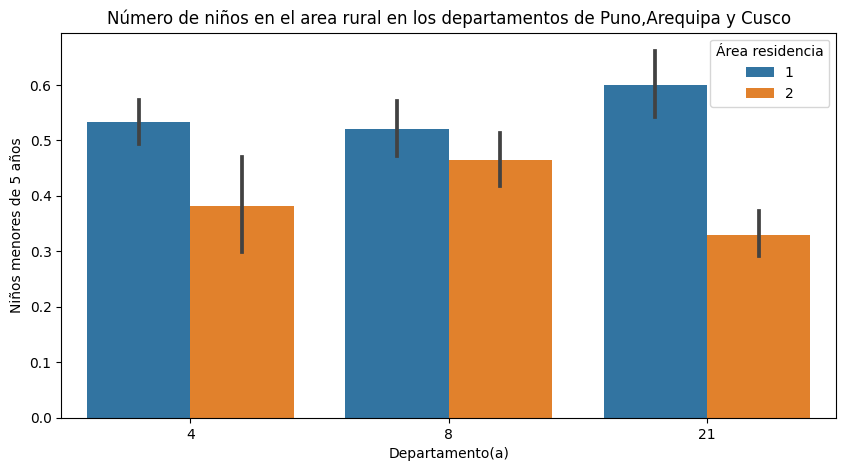

In [43]:
#26. Gráfico que muestre el número de niños en el area rural en los departamentos de Puno,Arequipa y Cusco
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x='Departamento(a)', y='Niños menores de 5 años', hue='Área residencia', data=df[df['Departamento(a)'].isin([21,4,8])])
plt.xlabel('Departamento(a)')
plt.ylabel('Niños menores de 5 años')
plt.title('Número de niños en el area rural en los departamentos de Puno,Arequipa y Cusco')
plt.show()

